In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
data = sns.load_dataset('penguins')
data.rename({'bill_length_mm':'culmen_length_mm', 'bill_depth_mm':'culmen_depth_mm'}, axis=1, inplace=True)
data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [54]:
promedio = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].mean()
print(promedio)
data['culmen_length_mm'].fillna(promedio[0], inplace = True)
data['culmen_depth_mm'].fillna(promedio[1], inplace = True)
data['flipper_length_mm'].fillna(promedio[2], inplace = True)
data['body_mass_g'].fillna(promedio[3], inplace = True)
data.head(10)

culmen_length_mm       43.921930
culmen_depth_mm        17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
5,Adelie,Torgersen,39.30000,20.60000,190.000000,3650.000000,Male
6,Adelie,Torgersen,38.90000,17.80000,181.000000,3625.000000,Female
7,Adelie,Torgersen,39.20000,19.60000,195.000000,4675.000000,Male
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,NaN
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,NaN


In [24]:
#Analisis descriptivo
#data.groupby('species').size().describe()
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


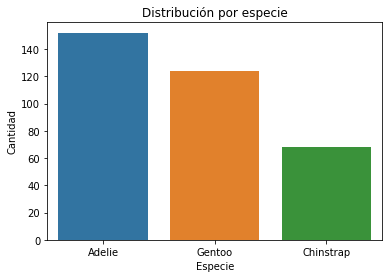

In [43]:
#Grafico de barras
count_species = data['species'].value_counts()
sns.barplot(x=count_species.index, y=count_species.values)
plt.title('Distribución por especie')
plt.xlabel('Especie')
plt.ylabel('Cantidad')
plt.show()

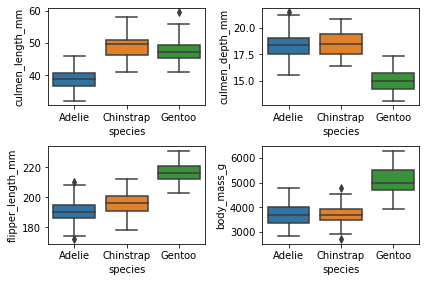

In [33]:
# Diagrama Box-plot
fig, axs = plt.subplots(2,2)
fn = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
cn = ['Adelie', 'Chinstrap', 'Gentoo']
sns.boxplot(x='species', y='culmen_length_mm', data=data, order = cn, ax=axs[0,0])
sns.boxplot(x='species', y='culmen_depth_mm', data=data, order = cn, ax=axs[0,1])
sns.boxplot(x='species', y='flipper_length_mm', data=data, order = cn, ax=axs[1,0])
sns.boxplot(x='species', y='body_mass_g', data=data, order = cn, ax=axs[1,1])
fig.tight_layout(pad=1.0);

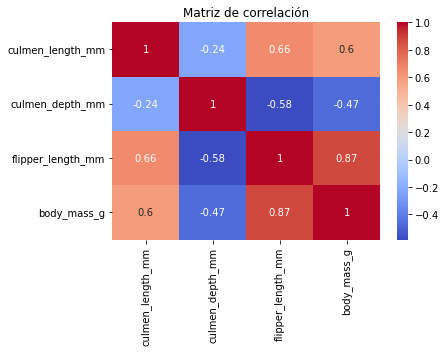

In [44]:
#Matriz de Correlacion
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Matriz de correlación')
plt.show()

#Los mejores son flipper_length_mm y body_mass_g por que los valores son los mas altos.

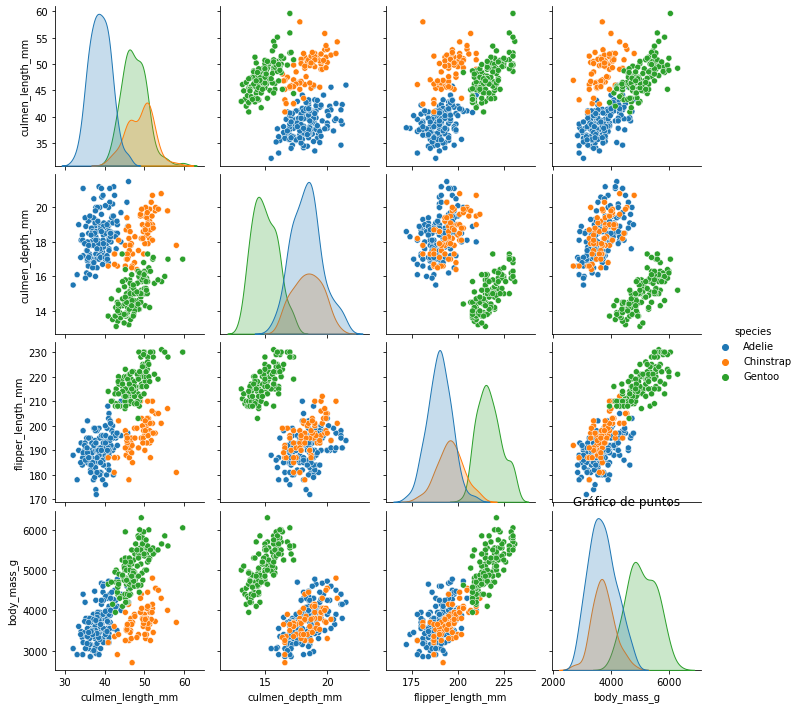

In [46]:
#Grafico de puntos
sns.pairplot(data, hue='species')
plt.title('Gráfico de puntos')
plt.show()

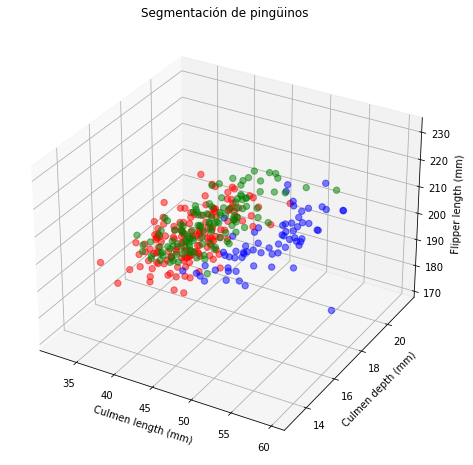

In [48]:
# Segmentación con gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = {'Adelie':'red', 'Chinstrap':'blue', 'Gentoo':'green'}
ax.scatter(data['culmen_length_mm'], data['culmen_depth_mm'], data['flipper_length_mm'], c=data['species'].apply(lambda x: colors[x]), s=40, alpha=0.5)
ax.set_xlabel('Culmen length (mm)')
ax.set_ylabel('Culmen depth (mm)')
ax.set_zlabel('Flipper length (mm)')
ax.set_title('Segmentación de pingüinos')
plt.show()